In [1]:
from keylogParser import *
from stat_helpers import *

bigrams = ['th', 'he', 'gh', 'nd', 'ne', 'in', 'er', 'an', 'ng', 'me', 'we', 'is', 'at', 'on', 'es', 'ay', 'or', 'hi']

test_results = get_pressed_data_diffs(bigrams, read_file('test'))
test_stats = get_stats(bigrams, test_results)

test_bigrams = test_stats['present_bigrams']

print(test_bigrams)


['th', 'he', 'nd', 'in', 'er', 'an', 'ng', 'me', 'we', 'at', 'on', 'es', 'or', 'hi']


## Save the results and stats for each user in variables

In [2]:
users = ['oskar', 'johan', 'aoife', 'luke']
stat_keys = ['std_devs', 'means', 'variances']

results = {}
stats = {}

for user in users:
	results[user] = get_pressed_data_diffs(test_bigrams, read_file(user))
	stats[user] = get_stats(test_bigrams, results[user])

## Print graphs by statistic for each user

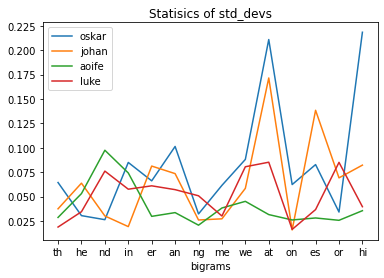

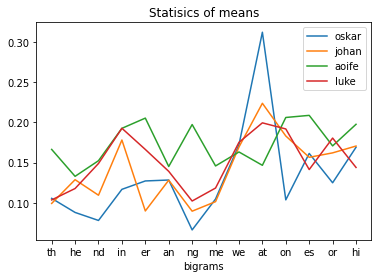

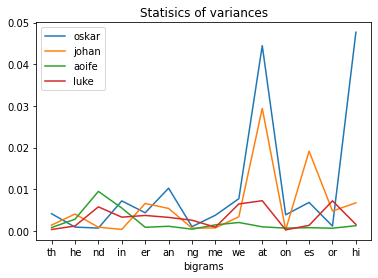

In [3]:
for stat_key in stat_keys:
	print_graph(stats, stat_key, test_bigrams, users)
	

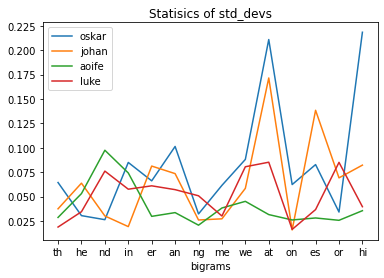

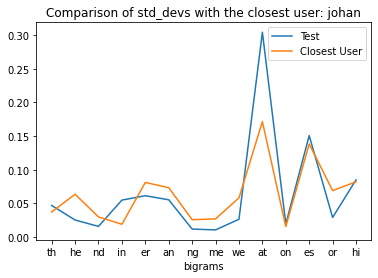

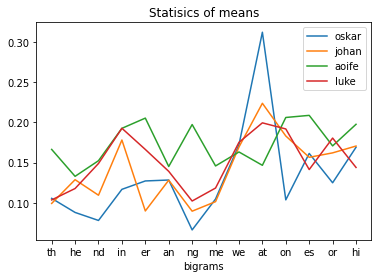

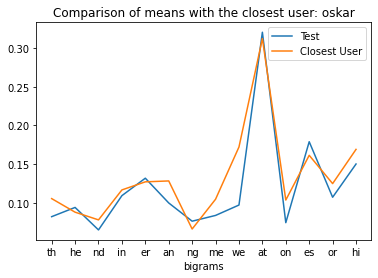

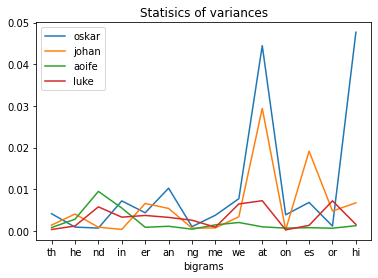

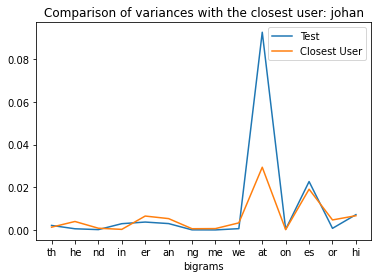

In [5]:
MSE = {}
closest_user = {'std_devs': '', 'means': '', 'variances': ''}

for user in users:
	MSE[user] = {}
	for stat_key in stat_keys:
		MSE[user][stat_key] = mse(stats[user][stat_key], test_stats[stat_key])


for stat_key in stat_keys:
	closest_user[stat_key] = find_closest_user(MSE, stat_key)
	print_graph(stats, stat_key, test_bigrams, users)
	print_closest_user_graph(stats, test_stats, closest_user[stat_key], stat_key, test_bigrams)
